In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#Define Stock name to download + define data period and interval 
ticker="msft"
start_date="2020-01-01"
end_date="2023-12-31"
interval="1d"

#download stock data 
stock=yf.download(ticker,start=start_date,end=end_date,interval=interval)
stock.reset_index(drop=False, inplace=True)

# Set 'Date' column as the index
#stock.set_index('Date', inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779541,22622100
1,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852264,21116200
2,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247375,20813700
3,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850098,21634100
4,2020-01-08,158.929993,160.800003,157.949997,160.089996,154.268768,27746500
...,...,...,...,...,...,...,...
1001,2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100
1002,2023-12-26,375.000000,376.940002,373.500000,374.660004,374.660004,12673100
1003,2023-12-27,373.690002,375.059998,372.809998,374.070007,374.070007,14905400
1004,2023-12-28,375.369995,376.459991,374.160004,375.279999,375.279999,14327000


In [ ]:
stock.head()

In [ ]:
stock.info()

In [ ]:
stock.describe()

In [ ]:
import plotly.express as px

fig = px.area(stock, x='Date', y='Close', line_shape='linear', labels={'Close': 'Microsoft Stock Close Price'},
              title='Microsoft Stock Price - Plotly Area Plot', template='plotly', color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title='Date', yaxis_title='Stock Price')
fig.show()


In [ ]:
# Fetching Data
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

# Visualization
def plot_prices(stock_data, stock_name):
    stock_data.plot(figsize=(12, 5), title=stock_name)
    plt.ylabel('Price')
    plt.show()

# Plot predictions
def plot_predictions(model, train_data, test_data, stock_name):
    start = len(train_data)
    end = start + len(test_data) - 1
    #list prediction
    prediction = list()
    prediction = model.predict(start=start, end=end, dynamic=True)
    
    plt.figure(figsize=(12, 5))
    plt.plot(train_data.index, train_data.values, label='Training Data', color='blue', alpha=0.5)
    plt.plot(test_data.index, test_data.values, label='Actual', color='green')
    plt.plot(test_data.index, prediction, label='Predicted', color='red')
    plt.title(stock_name + ' Stock Price Prediction')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    


## LSTM

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [24]:
np.random.seed(42)

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length:i+seq_length+1]
        sequences.append((seq, label))
    return np.array([s[0] for s in sequences]), np.array([s[1] for s in sequences])

seq_length = 14

# Preserve the original DataFrame with dates
data_df = stock.copy()

# Split the data based on dates
train_end_date = '2022-12-31'
train_data = data_df.loc[:train_end_date]
test_data = data_df.loc[train_end_date:]

# Extract data and create sequences for training and testing
scaler = MinMaxScaler(feature_range=(0, 1))

train_data_normalized = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))
X_train, y_train = create_sequences(train_data_normalized, seq_length)

test_data_normalized = scaler.transform(test_data['Close'].values.reshape(-1, 1))
X_test, y_test = create_sequences(test_data_normalized, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=60, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)





Epoch 1/50
6/6 [==============================] - 3s 19ms/step - loss: 0.4570
Epoch 2/50
6/6 [==============================] - 0s 29ms/step - loss: 0.2289
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0650
Epoch 4/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0265
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0246
Epoch 6/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0136
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0168
Epoch 8/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0121
Epoch 9/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0109
Epoch 10/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0107
Epoch 11/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0098
Epoch 12/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0096
Epoch 13/50
6/6 [==============================] - 0s 20ms/st

In [25]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Reshape predictions to 2D array
predictions_reshaped = predictions.reshape(predictions.shape[0], predictions.shape[1])

# Inverse transform the predictions and actual values to the original scale
predictions_actual = scaler.inverse_transform(predictions_reshaped)
y_test_actual = scaler.inverse_transform(y_test.reshape(y_test.shape[0], y_test.shape[1]))

# Get actual dates from the preserved DataFrame, adjusting for sequence length
actual_dates = data_df.index[len(train_data):len(train_data) + len(X_test)]

# Create the DataFrame with actual dates
df_results = pd.DataFrame({'Actual': y_test_actual.flatten(), 'Predicted': predictions_actual.flatten()})
df_results = df_results.set_index(actual_dates)

25/25 [==============================] - 1s 6ms/step


In [26]:

# Calculate Bollinger Bands
window_size = 20
df_results['Rolling Mean'] = df_results['Actual'].rolling(window=window_size).mean()
df_results['Upper Band'] = df_results['Rolling Mean'] + 2 * df_results['Actual'].rolling(window=window_size).std()
df_results['Lower Band'] = df_results['Rolling Mean'] - 2 * df_results['Actual'].rolling(window=window_size).std()



In [27]:
# Implement the enhanced trading strategy with actual holdings and cash balance tracking
initial_investment = 1000
num_shares_held = 0
cash_balance = initial_investment
portfolio_value = initial_investment
holding_shares = False

df_results['Signal'] = 0  # 0 for hold, 1 for buy, -1 for sell
df_results['Portfolio Value'] = 0  # Initialize Portfolio Value column

for i, row in df_results.iterrows():
    if row['Predicted'] < row['Lower Band'] and not holding_shares:  # Buy signal and not already holding shares
        num_shares_to_buy = np.floor(cash_balance / row['Actual'])
        num_shares_held += num_shares_to_buy
        cash_balance -= num_shares_to_buy * row['Actual']
        df_results.at[i, 'Signal'] = 1
        holding_shares = True
    elif row['Predicted'] > row['Upper Band'] and holding_shares:  # Sell signal and currently holding shares
        cash_balance += num_shares_held * row['Actual']
        num_shares_held = 0
        df_results.at[i, 'Signal'] = -1
        holding_shares = False

    portfolio_value = cash_balance + num_shares_held * row['Actual']
    df_results.at[i, 'Portfolio Value'] = portfolio_value

# Merge df_results with the original df based on the index
df_results_with_date = pd.merge(df_results, stock[['Date']], left_index=True, right_index=True, how='left')


C:\Users\M-ODE\AppData\Local\Temp\ipykernel_8776\1173711136.py:25: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '983.9499816894531' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



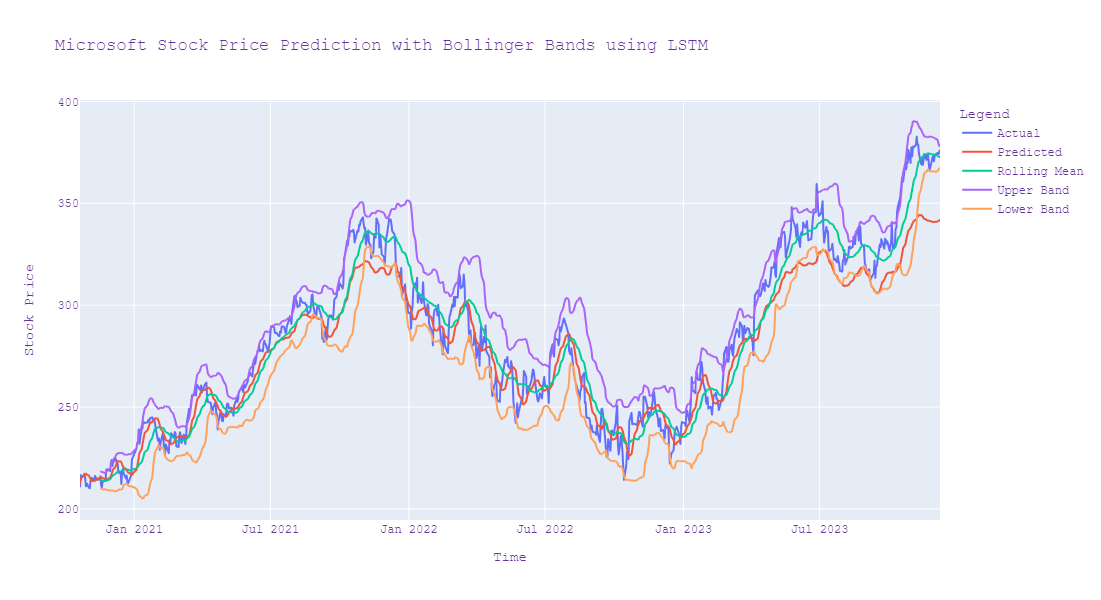

In [28]:
# Plotting the original figure with other metrics
fig = px.line(df_results_with_date, x='Date', y=['Actual', 'Predicted', 'Rolling Mean', 'Upper Band', 'Lower Band'],
              labels={'value': 'Stock Price'}, title='Microsoft Stock Price Prediction with Bollinger Bands using LSTM')

fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Stock Price',
    legend_title='Legend',
    font=dict(family="Courier New, monospace", size=12, color="RebeccaPurple"),
    template='plotly',
    height=600,  # Adjust the height as needed
    width=1000   # Adjust the width as needed
)

fig.show()

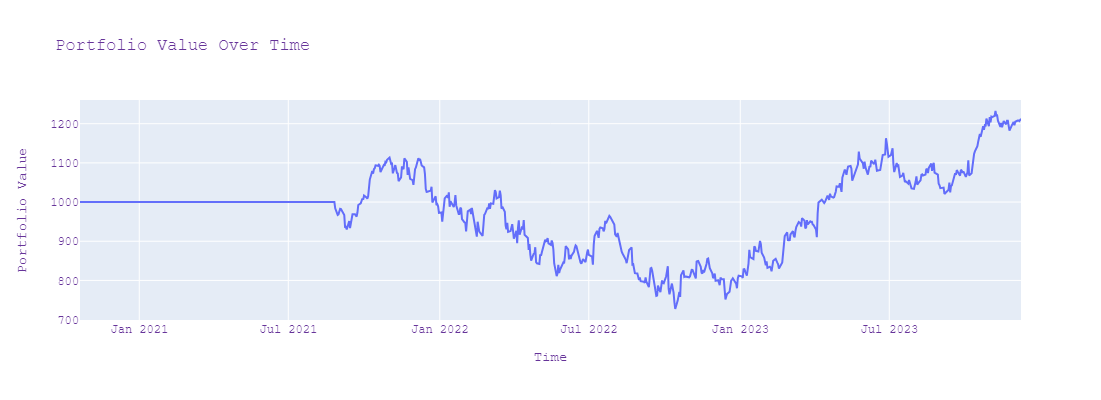

In [29]:
# Plotting Portfolio Value
fig_portfolio = px.line(df_results_with_date, x='Date', y='Portfolio Value',
                         labels={'value': 'Portfolio Value'}, title='Portfolio Value Over Time')

fig_portfolio.update_layout(
    xaxis_title='Time',
    yaxis_title='Portfolio Value',
    font=dict(family="Courier New, monospace", size=12, color="RebeccaPurple"),
    template='plotly',
    height=400,  # Adjust the height as needed
    width=800   # Adjust the width as needed
)

fig_portfolio.show()

## Prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import plotly.express as px

06:52:22 - cmdstanpy - INFO - Chain [1] start processing
06:52:22 - cmdstanpy - INFO - Chain [1] done processing


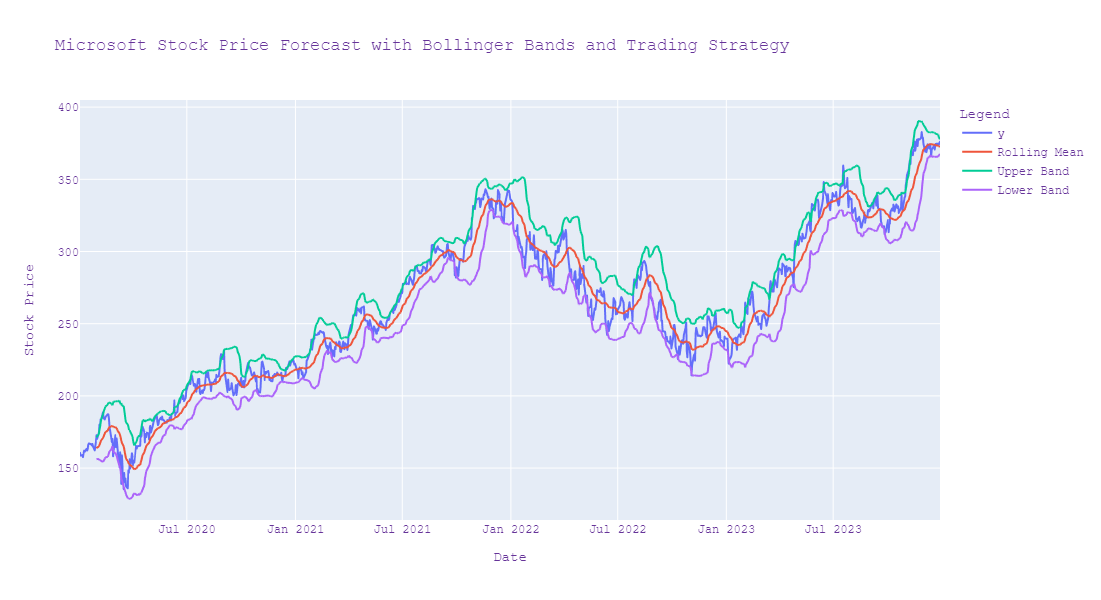

Expected Capital Gain for the entire period: $98.38


In [13]:
df_prophet = stock[['Date', 'Close']]

# Prepare the data for Prophet
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Make predictions for future dates
future = model.make_future_dataframe(periods=365)  # Forecasting for the next 365 days
forecast = model.predict(future)



In [ ]:
# Calculate Bollinger Bands
window_size = 20
df_prophet['Rolling Mean'] = df_prophet['y'].rolling(window=window_size).mean()
df_prophet['Upper Band'] = df_prophet['Rolling Mean'] + 2 * df_prophet['y'].rolling(window=window_size).std()
df_prophet['Lower Band'] = df_prophet['Rolling Mean'] - 2 * df_prophet['y'].rolling(window=window_size).std()

# Implement a basic trading strategy
df_prophet['Signal'] = 0  # 0 for hold, 1 for buy, -1 for sell

# Buy signal: Closing price below lower band
df_prophet.loc[df_prophet['y'] < df_prophet['Lower Band'], 'Signal'] = 1

# Sell signal: Closing price above upper band
df_prophet.loc[df_prophet['y'] > df_prophet['Upper Band'], 'Signal'] = -1

# Calculate expected capital gain
capital_gain = 1
position = 0

for i in range(1, len(df_prophet)):
    if df_prophet['Signal'][i] == 1 and position == 0:  # Buy signal and not already in position
        position = 1
        buy_price = df_prophet['y'][i]

    elif df_prophet['Signal'][i] == -1 and position == 1:  # Sell signal and in position
        position = 0
        sell_price = df_prophet['y'][i]
        capital_gain += sell_price - buy_price




In [ ]:
# Plotting with Plotly
fig = px.line(df_prophet, x='ds', y=['y', 'Rolling Mean', 'Upper Band', 'Lower Band'],
              labels={'y': 'Stock Price'}, title='Microsoft Stock Price Forecast with Bollinger Bands and Trading Strategy')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Stock Price',
    legend_title='Legend',
    font=dict(family="Courier New, monospace", size=12, color="RebeccaPurple"),
    template='plotly',
    height=600,  # Adjust the height as needed
    width=1000   # Adjust the width as needed
)

fig.show()

# Print expected capital gain
print(f'Expected Capital Gain for the entire period: ${capital_gain:.2f}')